In [1]:
!pip install scanpy
!pip install episcanpy

     |████████████████████████████████| 2.0 MB 12.8 MB/s 
     |████████████████████████████████| 86 kB 3.5 MB/s 
     |████████████████████████████████| 91 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 9.3 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=0353f02b1ab96ed494c3324808984530aa7bf4ef8b7f1417464ed897618238dd
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=5c9c620cc192e78eaf3380d8e1d61961425cb80ffcc9a9d66ae47835a37c46a2
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=5dd245b02407f903ac95200751d756204b105444dd07a71c666bd56ba48d6eab
  Stored in directory: /root/.cache/pi

## 1. Data preparation

### 1.1. RNA-seq

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.cluster import KMeans
import csv
import gzip
import episcanpy.api as epi

In [4]:
RNA_seq = sc.read_mtx(
    '../GSE126074_AdBrainCortex_SNAREseq_cDNA.counts.mtx.gz')

In [5]:
col_names = [row[0] for row in csv.reader(gzip.open('../GSE126074_AdBrainCortex_SNAREseq_cDNA.genes.tsv.gz', mode="rt"), delimiter="\t")]
row_names = [row[0] for row in csv.reader(gzip.open('../GSE126074_AdBrainCortex_SNAREseq_cDNA.barcodes.tsv.gz', mode="rt"), delimiter="\t")]

In [6]:
RNA_seq = RNA_seq.transpose()
RNA_seq.var.index = col_names
RNA_seq.obs.index = row_names

In [7]:
RNA_df = RNA_seq.to_df()
RNA_df

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610030E20Rik,0610031O16Rik,0610037L13Rik,...,Vmn1r68,Vmn1r82,Vmn2r-ps23,Vmn2r-ps24,Vmn2r-ps45,Vmn2r-ps83,Vmn2r50,Vpreb2,n-R5s32,n-R5s50
09A_CAGCCCCGCCTT,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_CGCCTACCATGA,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_GATGCGCGGCTA,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_GGTCCGAGTCCT,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_TCTCCCGGCACC,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09L_TACTAGTTCAAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09L_ATGACGGGCCCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09L_GAAACACCTCAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09L_AACGGTTTATCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
RNA_seq.obs

""
09A_CAGCCCCGCCTT
09A_CGCCTACCATGA
09A_GATGCGCGGCTA
09A_GGTCCGAGTCCT
09A_TCTCCCGGCACC
...
09L_TACTAGTTCAAG
09L_ATGACGGGCCCC
09L_GAAACACCTCAT
09L_AACGGTTTATCC


In [9]:
RNA_seq.var

""
0610005C13Rik
0610007P14Rik
0610009B22Rik
0610009E02Rik
0610009L18Rik
...
Vmn2r-ps83
Vmn2r50
Vpreb2
n-R5s32


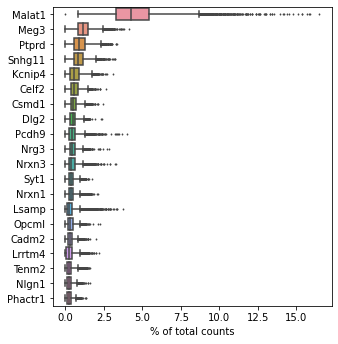

In [10]:
sc.pl.highest_expr_genes(RNA_seq, n_top=20, )

In [11]:
sc.pp.filter_cells(RNA_seq, min_genes=20)

In [12]:
sc.pp.filter_genes(RNA_seq, min_cells=5)

In [13]:
sc.pp.calculate_qc_metrics(RNA_seq, percent_top=None, log1p=False, inplace=True)

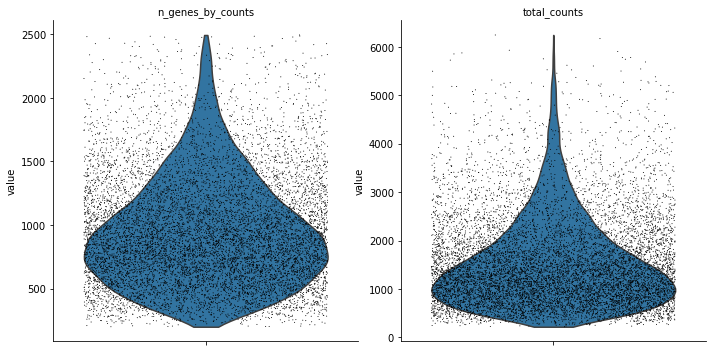

In [14]:
sc.pl.violin(RNA_seq, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

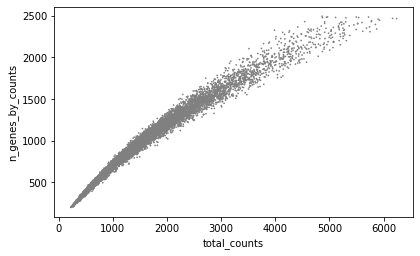

In [15]:
sc.pl.scatter(RNA_seq, x='total_counts', y='n_genes_by_counts')

In [16]:
RNA_seq = RNA_seq[RNA_seq.obs.n_genes_by_counts < 2500, :]

In [17]:
sc.pp.normalize_total(RNA_seq, target_sum=1e4)

In [18]:
sc.pp.log1p(RNA_seq)

In [19]:
sc.pp.highly_variable_genes(RNA_seq, min_mean=0.0125, max_mean=3, min_disp=0.5)

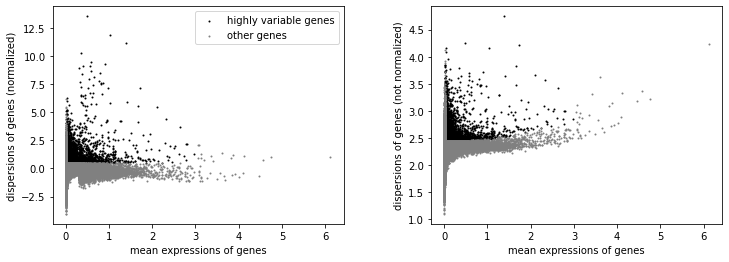

In [20]:
sc.pl.highly_variable_genes(RNA_seq)

In [21]:
RNA_seq = RNA_seq[:, RNA_seq.var.highly_variable]

In [22]:
sc.pp.regress_out(RNA_seq, ['total_counts'])

In [23]:
sc.pp.scale(RNA_seq, max_value=10)

In [24]:
RNA_seq

AnnData object with n_obs × n_vars = 10309 × 3928
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

### 1.2. ATAC-seq

In [25]:
ATAC_seq = sc.read_mtx(
    '../GSE126074_AdBrainCortex_SNAREseq_chromatin.counts.mtx.gz')

In [26]:
cols_names = [row[0] for row in csv.reader(gzip.open('../GSE126074_AdBrainCortex_SNAREseq_chromatin.barcodes.tsv.gz', mode="rt"), delimiter="\t")]
rows_names = [row[0] for row in csv.reader(gzip.open('../GSE126074_AdBrainCortex_SNAREseq_chromatin.peaks.tsv.gz', mode="rt"), delimiter="\t")]

In [27]:
ATAC_seq.var.index = cols_names
ATAC_seq.obs.index = rows_names
ATAC_seq = ATAC_seq.transpose()

In [28]:
ATAC_seq

AnnData object with n_obs × n_vars = 10309 × 244544

In [29]:
ATAC_seq.var_names

Index(['chr1:3005833-3005982', 'chr1:3094772-3095489', 'chr1:3119556-3120739',
       'chr1:3121334-3121696', 'chr1:3134637-3135032', 'chr1:3164929-3165186',
       'chr1:3167174-3167517', 'chr1:3181253-3181529', 'chr1:3204775-3205172',
       'chr1:3210899-3211332',
       ...
       'chrY:1286238-1286811', 'chrY:1299405-1299847',
       'chrY:10640917-10641104', 'chrY:90719613-90719806',
       'chrY:90726135-90726362', 'chrY:90732105-90732474',
       'chrY:90740917-90741416', 'chrY:90741519-90742734',
       'chrY:90742824-90743114', 'chrY:90744284-90744731'],
      dtype='object', length=244544)

In [30]:
ATAC_seq1 = ATAC_seq.X.tocsr()

In [31]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation( n_components = 10, n_jobs= -1)
lda_components = lda_model.fit_transform(ATAC_seq1)
lda_components.shape

(10309, 10)

In [32]:
lda_components = pd.DataFrame(lda_components)
lda_components.index = ATAC_seq.obs.index
lda_components = lda_components.rename(columns = {lda_components.columns[0]:'LDA_C1', lda_components.columns[1]:'LDA_C2', lda_components.columns[2]:'LDA_C3', lda_components.columns[3]:'LDA_C4', lda_components.columns[4]:'LDA_C5', lda_components.columns[5]:'LDA_C6', lda_components.columns[6]:'LDA_C7', lda_components.columns[7]:'LDA_C8', lda_components.columns[8]:'LDA_C9', lda_components.columns[9]:'LDA_C10'})      
lda_components.head()

,LDA_C1,LDA_C2,LDA_C3,LDA_C4,LDA_C5,LDA_C6,LDA_C7,LDA_C8,LDA_C9,LDA_C10
09A_GATGCGCGGCTA,0.001576,0.370361,0.000014,0.000014,0.163113,0.000014,0.000014,0.456522,0.008357,0.000014
09A_GCCATGACCCCA,0.000014,0.073709,0.000014,0.000014,0.432881,0.000014,0.000014,0.492825,0.000014,0.000502
09F_TGGACGATTTGT,0.000014,0.045409,0.000014,0.000014,0.287421,0.000014,0.000014,0.633937,0.000014,0.033147
09K_GTCTGCCATTAC,0.000016,0.420348,0.000016,0.000016,0.297941,0.000016,0.000016,0.152700,0.000016,0.128914
09F_GGATGAAGAGGG,0.001206,0.235927,0.000020,0.000020,0.242256,0.000020,0.000020,0.479805,0.000020,0.040703


In [33]:
LDAATAC_seq = sc.AnnData(lda_components)

In [35]:
LDAATAC_seq

AnnData object with n_obs × n_vars = 10309 × 10

## 2. Integration

### 2.1 Use MMD-MA to integrate the data above

In [36]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3 MB 25 kB/s 
     |████████████████████████████████| 503 kB 61.4 MB/s 
     |████████████████████████████████| 3.8 MB 49.2 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=a9226186010fd94963cdfecbe4764d85a9b2fdfc4e782cf4f92fc0178a9946f0
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succes

In [37]:
import tensorflow as tf
import numpy as np
import argparse
from sklearn.metrics.pairwise import linear_kernel

In [38]:
def compute_pairwise_distances(x, y):
  """Computes the squared pairwise Euclidean distances between x and y.
  Args:
    x: a tensor of shape [num_x_samples, num_features]
    y: a tensor of shape [num_y_samples, num_features]
  Returns:
    a distance matrix of dimensions [num_x_samples, num_y_samples].
  Raises:
    ValueError: if the inputs do no matched the specified dimensions.
  """

  if not len(x.get_shape()) == len(y.get_shape()) == 2:
    raise ValueError('Both inputs should be matrices.')

  if x.get_shape().as_list()[1] != y.get_shape().as_list()[1]:
    raise ValueError('The number of features should be the same.')

    
  norm = lambda x: tf.reduce_sum(tf.square(x), 1)
  
    # By making the `inner' dimensions of the two matrices equal to 1 using
  # broadcasting then we are essentially substracting every pair of rows
  # of x and y.
  # x will be num_samples x num_features x 1,
  # and y will be 1 x num_features x num_samples (after broadcasting).
  # After the substraction we will get a
  # num_x_samples x num_features x num_y_samples matrix.
  # The resulting dist will be of shape num_y_samples x num_x_samples.
  # and thus we need to transpose it again.
  return tf.transpose(norm(tf.expand_dims(x, 2) - tf.transpose(y)))

In [39]:
def gaussian_kernel_matrix(x, y, sigmas):
  """Computes a Guassian Radial Basis Kernel between the samples of x and y.
  We create a sum of multiple gaussian kernels each having a width sigma_i.
  Args:
    x: a tensor of shape [num_samples, num_features]
    y: a tensor of shape [num_samples, num_features]
    sigmas: a tensor of floats which denote the widths of each of the
      gaussians in the kernel.
  Returns:
    A tensor of shape [num_samples{x}, num_samples{y}] with the RBF kernel.
  """
  beta = 1. / (2. * (tf.expand_dims(sigmas, 1)))

  dist = compute_pairwise_distances(x, y)

  s = tf.matmul(beta, tf.reshape(dist, (1, -1)))

  return tf.reshape(tf.reduce_sum(tf.exp(-s), 0), tf.shape(dist))


In [40]:
def maximum_mean_discrepancy(x, y, kernel=gaussian_kernel_matrix, bandwidth=1.0):
  """Computes the Maximum Mean Discrepancy (MMD) of two samples: x and y.
  Maximum Mean Discrepancy (MMD) is a distance-measure between the samples of
  the distributions of x and y. Here we use the kernel two sample estimate
  using the empirical mean of the two distributions.
  MMD^2(P, Q) = || \E{\phi(x)} - \E{\phi(y)} ||^2
              = \E{ K(x, x) } + \E{ K(y, y) } - 2 \E{ K(x, y) },
  where K = <\phi(x), \phi(y)>,
    is the desired kernel function, in this case a radial basis kernel.
  Args:
      x: a tensor of shape [num_samples, num_features]
      y: a tensor of shape [num_samples, num_features]
      kernel: a function which computes the kernel in MMD. Defaults to the
              GaussianKernelMatrix.
  Returns:
      a scalar denoting the squared maximum mean discrepancy loss.
  """
  with tf.name_scope('MaximumMeanDiscrepancy'):
    # \E{ K(x, x) } + \E{ K(y, y) } - 2 \E{ K(x, y) }
    cost = tf.reduce_mean(kernel(x, x, tf.constant([bandwidth])))
    cost += tf.reduce_mean(kernel(y, y, tf.constant([bandwidth])))
    cost -= 2 * tf.reduce_mean(kernel(x, y, tf.constant([bandwidth])))

    # We do not allow the loss to become negative.
    cost = tf.where(cost > 0, cost, 0, name='value')
  return cost

In [41]:
new_ATAC = lda_components[:500].to_numpy()
RNA_np = RNA_seq[:500].X.toarray()

In [42]:
rna_dataset_sample_lk = linear_kernel(RNA_np, Y = None, dense_output = True)
atac_dataset_sample_lk = linear_kernel(new_ATAC, Y = None, dense_output = True)


In [43]:
tradeoff2 = 0.01
tradeoff3 = 0.001
bandwidth = 1.0
training_rate = 0.00005

I_p=tf.eye(2)
record = open('loss.txt', 'w')
n1 = rna_dataset_sample_lk.shape[0]
n2 = atac_dataset_sample_lk.shape[0]
K1 = tf.constant(rna_dataset_sample_lk, dtype=tf.float32)
K2 = tf.constant(atac_dataset_sample_lk, dtype=tf.float32)
alpha = tf.Variable(tf.random_uniform([n1,2],minval=0.0,maxval=0.1,seed=0))
beta = tf.Variable(tf.random_uniform([n2,2],minval=0.0,maxval=0.1,seed=0))  

# myFunction = tradeoff1*maximum_mean_discrepancy(tf.matmul(K1,alpha), tf.matmul(K2,beta)) + tradeoff2*(tf.norm(tf.subtract(tf.matmul(tf.transpose(alpha),tf.matmul(K1,alpha)),I_p),ord=2) + tf.norm(tf.subtract(tf.matmul(tf.transpose(beta),tf.matmul(K2,beta)),I_p),ord=2)) + tradeoff3*(tf.norm(tf.subtract(tf.matmul(tf.matmul(K1,alpha),tf.matmul(tf.transpose(alpha),tf.transpose(K1))),K1),ord=2)+tf.norm(tf.subtract(tf.matmul(tf.matmul(K2,beta),tf.matmul(tf.transpose(beta),tf.transpose(K2))),K2),ord=2))
mmd_part = maximum_mean_discrepancy(tf.matmul(K1,alpha), tf.matmul(K2,beta), bandwidth=bandwidth)
penalty_part = tradeoff2*(tf.norm(tf.subtract(tf.matmul(tf.transpose(alpha),tf.matmul(K1,alpha)),I_p),ord=2) + tf.norm(tf.subtract(tf.matmul(tf.transpose(beta),tf.matmul(K2,beta)),I_p),ord=2))
distortion_part = tradeoff3*(tf.norm(tf.subtract(tf.matmul(tf.matmul(K1,alpha),tf.matmul(tf.transpose(alpha),tf.transpose(K1))),K1),ord=2)+tf.norm(tf.subtract(tf.matmul(tf.matmul(K2,beta),tf.matmul(tf.transpose(beta),tf.transpose(K2))),K2),ord=2))
myFunction = mmd_part + penalty_part + distortion_part
train_step = tf.train.AdamOptimizer(training_rate).minimize(myFunction)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(10001):
  sess.run(train_step)
  if (i%100 == 0): 
    np.savetxt("alpha_hat_"+str(0)+"_"+str(i)+".txt", sess.run(alpha))
    np.savetxt("beta_hat_"+str(0)+"_"+str(i)+".txt", sess.run(beta))
    rec = '\t'.join([str(0), str(i), str(sess.run(myFunction)), str(sess.run(mmd_part)), str(sess.run(penalty_part)), str(sess.run(distortion_part))])  
    record.write(rec + '\n')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [44]:
f = open('../content/alpha_hat_0_10000.txt')
data1 = np.loadtxt(f)
f = open('../content/beta_hat_0_10000.txt')
data2 = np.loadtxt(f)

In [49]:
### evals

"""
Author: Ritambhara Singh, Pinar Demetci, Rebecca Santorella
19 February 2020
"""
import numpy as np
import random, math, os, sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics import roc_auc_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

def calc_frac_idx(x1_mat,x2_mat):
	"""
	Returns fraction closer than true match for each sample (as an array)
	"""
	fracs = []
	x = []
	nsamp = x1_mat.shape[0]
	rank=0
	for row_idx in range(nsamp):
		euc_dist = np.sqrt(np.sum(np.square(np.subtract(x1_mat[row_idx,:], x2_mat)), axis=1))
		true_nbr = euc_dist[row_idx]
		sort_euc_dist = sorted(euc_dist)
		rank =sort_euc_dist.index(true_nbr)
		frac = float(rank)/(nsamp -1)

		fracs.append(frac)
		x.append(row_idx+1)

	return fracs,x

def calc_domainAveraged_FOSCTTM(x1_mat, x2_mat):
	"""
	Outputs average FOSCTTM measure (averaged over both domains)
	Get the fraction matched for all data points in both directions
	Averages the fractions in both directions for each data point
	"""
	fracs1,xs = calc_frac_idx(x1_mat, x2_mat)
	fracs2,xs = calc_frac_idx(x2_mat, x1_mat)
	fracs = []
	for i in range(len(fracs1)):
		fracs.append((fracs1[i]+fracs2[i])/2)  
	return fracs

def calc_sil(x1_mat,x2_mat,x1_lab,x2_lab):
	"""
	Returns silhouette score for datasets with cell clusters
	"""
	sil = []
	sil_d0 = []
	sil_d3 = []
	sil_d7 = []
	sil_d11 = []
	sil_npc = []

	x = np.concatenate((x1_mat,x2_mat))
	lab = np.concatenate((x1_lab,x2_lab))

	sil_score = silhouette_samples(x,lab)

	nsamp = x.shape[0]
	for i in range(nsamp):
		if(lab[i]==1):
			sil_d0.append(sil_score[i])
		elif(lab[i]==2):
			sil_d3.append(sil_score[i])
		elif(lab[i]==3):
			sil_d7.append(sil_score[i])
		elif(lab[i]==4):
			sil_d11.append(sil_score[i])
		elif(lab[i]==5):
			sil_npc.append(sil_score[i])

	avg = np.mean(sil_score)
	d0 = sum(sil_d0)/len(sil_d0)
	d3 = sum(sil_d3)/len(sil_d3)
	d7 = sum(sil_d7)/len(sil_d7)
	d11 = sum(sil_d11)/len(sil_d11)
	npc = sum(sil_npc)/len(sil_npc)
	
	return avg,d0,d3,d7,d11,npc

def binarize_labels(label,x):
	"""
	Helper function for calc_auc
	"""
	bin_lab = np.array([1] * len(x))
	idx = np.where(x == label)
	
	bin_lab[idx] = 0
	return bin_lab
	
def calc_auc(x1_mat, x2_mat, x1_lab, x2_lab):
	"""
	calculate avg. ROC AUC scores for transformed data when there are >=2 number of clusters.
	"""
	nsamp = x1_mat.shape[0]
	
	auc = []
	auc_d0 = []
	auc_d3 = []
	auc_d7 = []
	auc_d11 = []
	auc_npc = []
	
	for row_idx in range(nsamp):
		euc_dist = np.sqrt(np.sum(np.square(np.subtract(x1_mat[row_idx,:], x2_mat)), axis=1))
		y_scores = euc_dist
		y_true = binarize_labels(x1_lab[row_idx],x2_lab)
				
		auc_score = roc_auc_score(y_true, y_scores)
		auc.append(auc_score)
	
		if(x1_lab[row_idx]==0):
			auc_d0.append(auc_score)
		elif(x1_lab[row_idx]==1):
			auc_d3.append(auc_score)
		elif(x1_lab[row_idx]==2):
			auc_d7.append(auc_score)
		elif(x1_lab[row_idx]==3):
			auc_d11.append(auc_score)
		elif(x1_lab[row_idx]==4):
			auc_npc.append(auc_score)
		
	avg = sum(auc)/len(auc)
	d0 = sum(auc_d0)/len(auc_d0)
	d3 = sum(auc_d3)/len(auc_d3)
	d7 = sum(auc_d7)/len(auc_d7)
	d11 = sum(auc_d11)/len(auc_d11)
	npc = sum(auc_npc)/len(auc_npc)
	
	return avg,d0,d3,d7,d11,npc

def transfer_accuracy(domain1, domain2, type1, type2, n):
	"""
	Metric from UnionCom: "Label Transfer Accuracy"
	"""
	knn = KNeighborsClassifier(n_neighbors=n)
	knn.fit(domain2, type2)
	type1_predict = knn.predict(domain1)
	np.savetxt("type1_predict.txt", type1_predict)
	count = 0
	for label1, label2 in zip(type1_predict, type1):
		if label1 == label2:
			count += 1
	return count / len(type1)


In [50]:
import numpy as np
fracs_mmd = calc_domainAveraged_FOSCTTM(data1, data2)
avFOSCTTM_mmd = np.mean(fracs_mmd)
print("Average FOSCTTM score for MMD", avFOSCTTM_mmd)

Average FOSCTTM score for MMD 0.49252304609218434


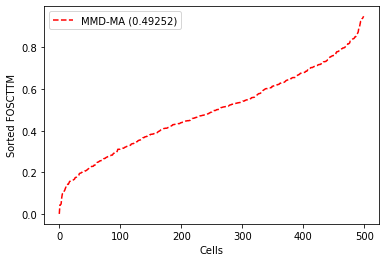

In [51]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(fracs_mmd)), np.sort(fracs_mmd), "r--", label = "MMD-MA ("+str(round(avFOSCTTM_mmd, 5))+")")
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()

## 3. Data Preparation

In [18]:
import pandas as pd
df = pd.read_csv('../Scere20170205.txt', sep = '\t', index_col = False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


In [19]:
df

,ID interactor A,ID interactor B,Alt. ID interactor A,Alt. ID interactor B,Alias(es) interactor A,Alias(es) interactor B,Interaction detection method(s),Publication 1st author(s),Publication Identifier(s),Taxid interactor A,Taxid interactor B,Interaction type(s),Source database(s),Interaction identifier(s),Confidence value(s),Processing Status,Unnamed: 16
0,DIP-25N|refseq:NP_012903|uniprotkb:P09798,DIP-25N|refseq:NP_012903|uniprotkb:P09798,-,-,-,-,MI:0019(coimmunoprecipitation)|MI:0018(two hyb...,-,pubmed:7925276|pubmed:DIP-246S|pubmed:7925276|...,taxid:4932(Saccharomyces cerevisiae),taxid:4932(Saccharomyces cerevisiae),MI:0218(physical interaction)|MI:0218(physical...,MI:0465(dip),DIP-137E,dip-quality-status:core,dip:0002(small scale)|dip:0002(small scale),NaN
1,DIP-343N|refseq:NP_009971|uniprotkb:P23255,DIP-80N|refseq:NP_523805|uniprotkb:P20227,-,-,-,-,MI:0045(experimental interaction detection)|MI...,-,pubmed:8178153|pubmed:DIP-31S|pubmed:8178153|p...,taxid:4932(Saccharomyces cerevisiae),taxid:7227(Drosophila melanogaster),MI:0218(physical interaction)|MI:0218(physical...,MI:0465(dip),DIP-163E,dip-quality-status:core,dip:0002(small scale)|dip:0002(small scale),NaN
2,DIP-551N|refseq:NP_012231|uniprotkb:P07278,DIP-548N|refseq:NP_012371|uniprotkb:P06244,-,-,-,-,MI:0018(two hybrid)|MI:0018(two hybrid)|MI:039...,-,pubmed:16924114|pubmed:DIP-17259S|pubmed:16924...,taxid:4932(Saccharomyces cerevisiae),taxid:4932(Saccharomyces cerevisiae),MI:0915(physical association)|MI:0915(physical...,MI:0465(dip),DIP-244E,dip-quality-status:core,dip:0004(small scale)|dip:0004(small scale)|di...,NaN
3,DIP-18N|refseq:NP_010765|uniprotkb:P06782,DIP-780N|refseq:NP_014142|uniprotkb:P38717,-,-,-,-,MI:0018(two hybrid),-,pubmed:8127709|pubmed:DIP-255S,taxid:4932(Saccharomyces cerevisiae),taxid:4932(Saccharomyces cerevisiae),MI:0218(physical interaction),MI:0465(dip),DIP-436E,dip-quality-status:core,dip:0002(small scale),NaN
4,DIP-1104N|refseq:NP_013826|uniprotkb:P07342,DIP-671N|refseq:NP_009918|uniprotkb:P25605,-,-,-,-,MI:0013(biophysical)|MI:0071(molecular sieving...,-,pubmed:10213630|pubmed:DIP-2092S|pubmed:114633...,taxid:4932(Saccharomyces cerevisiae),taxid:4932(Saccharomyces cerevisiae),MI:0218(physical interaction)|MI:0218(physical...,MI:0465(dip),DIP-125E,dip-quality-status:core,dip:0002(small scale)|dip:0002(small scale)|di...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22972,DIP-4637N|refseq:NP_013525|uniprotkb:O13563,DIP-6817N|refseq:NP_013180|uniprotkb:P38634,-,-,-,-,MI:0096(pull down),-,pubmed:26912900|pubmed:DIP-18124S,taxid:4932(Saccharomyces cerevisiae),taxid:4932(Saccharomyces cerevisiae),MI:0915(physical association),MI:0465(dip),DIP-201142E,dip-quality-status:core,dip:0004(small scale),NaN
22973,DIP-1294N|refseq:NP_011314|uniprotkb:P53091,DIP-2405N|refseq:NP_013204|uniprotkb:Q08032,-,-,-,-,MI:0007(anti tag coimmunoprecipitation),-,pubmed:26854664|pubmed:DIP-18092S,taxid:4932(Saccharomyces cerevisiae),taxid:4932(Saccharomyces cerevisiae),MI:0915(physical association),MI:0465(dip),DIP-201270E,dip-quality-status:core,dip:0004(small scale),NaN
22974,DIP-1294N|refseq:NP_011314|uniprotkb:P53091,DIP-1812N|refseq:NP_010296|uniprotkb:Q12488,-,-,-,-,MI:0007(anti tag coimmunoprecipitation),-,pubmed:26854664|pubmed:DIP-18092S,taxid:4932(Saccharomyces cerevisiae),taxid:4932(Saccharomyces cerevisiae),MI:0915(physical association),MI:0465(dip),DIP-201271E,dip-quality-status:core,dip:0004(small scale),NaN
22975,DIP-2492N|refseq:NP_116650|uniprotkb:P07560,DIP-963N|refseq:NP_014824|uniprotkb:Q12446,-,-,-,-,"MI:0096(pull down)|MI:0809,(bimolecular fluore...",-,pubmed:27526190|pubmed:DIP-18183S|pubmed:27526...,taxid:4932(Saccharomyces cerevisiae),taxid:4932(Saccharomyces cerevisiae),MI:0407(direct interaction)|MI:0915(physical a...,MI:0465(dip),DIP-201456E,dip-quality-status:core,dip:0004(small scale)|dip:0004(small scale),NaN


In [20]:
df = df[['ID interactor A', 'ID interactor B']]

In [21]:
df

,ID interactor A,ID interactor B
0,DIP-25N|refseq:NP_012903|uniprotkb:P09798,DIP-25N|refseq:NP_012903|uniprotkb:P09798
1,DIP-343N|refseq:NP_009971|uniprotkb:P23255,DIP-80N|refseq:NP_523805|uniprotkb:P20227
2,DIP-551N|refseq:NP_012231|uniprotkb:P07278,DIP-548N|refseq:NP_012371|uniprotkb:P06244
3,DIP-18N|refseq:NP_010765|uniprotkb:P06782,DIP-780N|refseq:NP_014142|uniprotkb:P38717
4,DIP-1104N|refseq:NP_013826|uniprotkb:P07342,DIP-671N|refseq:NP_009918|uniprotkb:P25605
...,...,...
22972,DIP-4637N|refseq:NP_013525|uniprotkb:O13563,DIP-6817N|refseq:NP_013180|uniprotkb:P38634
22973,DIP-1294N|refseq:NP_011314|uniprotkb:P53091,DIP-2405N|refseq:NP_013204|uniprotkb:Q08032
22974,DIP-1294N|refseq:NP_011314|uniprotkb:P53091,DIP-1812N|refseq:NP_010296|uniprotkb:Q12488
22975,DIP-2492N|refseq:NP_116650|uniprotkb:P07560,DIP-963N|refseq:NP_014824|uniprotkb:Q12446


In [22]:
source = df["ID interactor A"].values.tolist()
target = df["ID interactor B"].values.tolist()

source_id = []
for i in range(len(source)):
    k = source[i].split("|")[0].split("-")[-1][:-1]
    if(k not in source_id):
        source_id.append(k)
    
target_id = []
for i in range(len(target)):
    k = target[i].split("|")[0].split("-")[-1][:-1]
    if(k not in target_id):
        target_id.append(k)  

In [23]:
s = {source_id[i]: i for i in range(len(source_id))}
t = {target_id[i]: i for i in range(len(target_id))}
max_len = max(len(s),len(t))
import numpy as np
adjmatrix = np.zeros((max_len,max_len))

for i in range(len(source)):
    a = source[i].split("|")[0].split("-")[-1][:-1]
    b = target[i].split("|")[0].split("-")[-1][:-1]

    adjmatrix[s[a],t[b]] = 1

In [24]:
adjmatrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

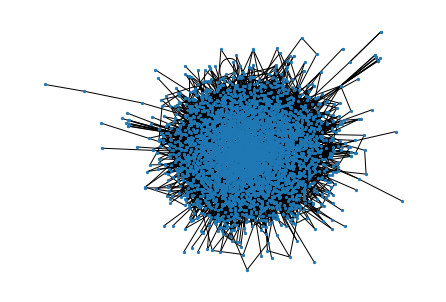

In [26]:
G = nx.from_numpy_matrix(adjmatrix)
nx.draw(G, node_size = 5)

## 4. Graph partition

### 4.1. mincut

In [ ]:

def add_min_partition(parts, cut_value):
    if(len(parts[0]) < len(parts[1])):
        data.append(partition[0])
        partition.append(cut_value)
        return max(parts[1]), min(partition[1]), partition[1]
    else:
        data.append(partition[1])
        partition.append(cut_value)
        return max(partition[0]), min(partition[0]), partition[0]
        

In [40]:
data = []
parts = []
value, partition = nx.minimum_cut(G, 0, adjmatrix.shape[0]-1, capacity='weight')
target,source,sub_nodes= add_min_partition(partition,value)

In [42]:
for i in range(45):
  cut_value,partition = nx.minimum_cut(G.subgraph(sub_nodes),source,target,capacity='weight')
  t,s,sub_nodes = add_min_partition(partition,cut_value)
data.append(partition[0])
data.append(partition[1])

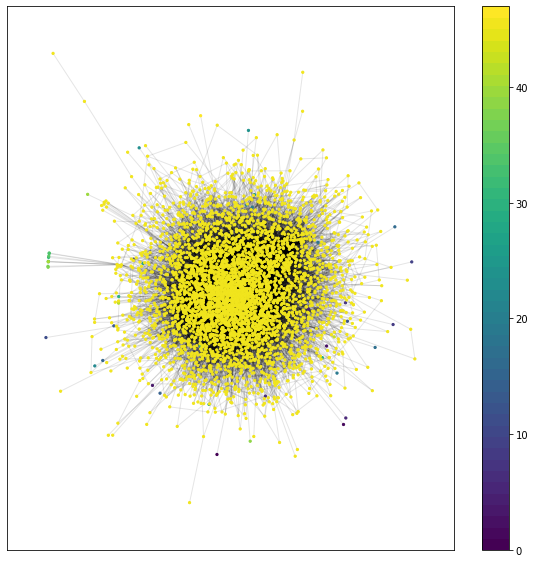

In [43]:
mincut_partition.append(cut_value)
len(data)
group_labels = dict()
for i in range(len(data)):
    for j in data[i]:
        group_labels[j] = i
# form the graph
G = nx.from_numpy_matrix(adjmatrix)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, scale=100)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(group_labels.values()) + 1)
nodes=nx.draw_networkx_nodes(G, pos, group_labels.keys(), node_size=5,
                       cmap=cmap, node_color=list(group_labels.values()))
nx.draw_networkx_edges(G, pos, alpha=0.1)

plt.sci(nodes)
plt.colorbar()
plt.show()

### 4.2. Normalized cut

In [71]:
from sklearn.cluster import SpectralClustering
#Clustering using normal cut
sClustering = SpectralClustering(n_clusters = 50, affinity='precomputed', n_init=100)
sClustering.fit(adjmatrix)

print('Spectral clustering:')
print(sClustering.labels_)
groupDict = dict(enumerate(x for x in sClustering.labels_))

Spectral clustering:
[16 16 16 ... 16 10 10]


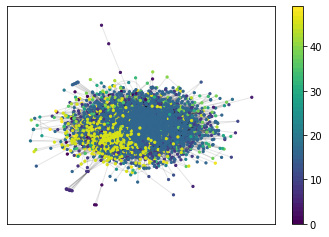

In [72]:
plt.figure()
pos = nx.spring_layout(G, scale = 100)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(groupDict.values()) + 1)
nodes=nx.draw_networkx_nodes(G, pos, groupDict.keys(), node_size = 5,
                       cmap = cmap, node_color = list(groupDict.values()))
nx.draw_networkx_edges(G, pos, alpha = 0.1)

plt.sci(nodes)
plt.colorbar()
plt.show()

### 4.3. Modularity

In [79]:
partition = community_louvain.best_partition(G,  resolution = 0.85)

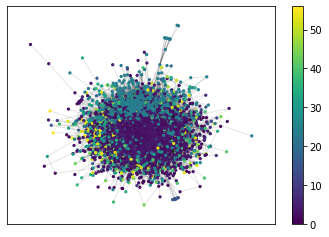

In [80]:
#Draw the graph
plt.figure()
pos = nx.spring_layout(G, scale = 100)
#Color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nodes=nx.draw_networkx_nodes(G, pos, partition.keys(), node_size = 5,
                       cmap = cmap, node_color = list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha = 0.1)

plt.sci(nodes)
plt.colorbar()
plt.show()

## 5. Evaluation

In [ ]:
#!pip install goatools

In [9]:
from goatools.base import download_ncbi_associations
fin_gene2go = download_ncbi_associations()

from goatools.anno.genetogo_reader import Gene2GoReader
objanno_sce = Gene2GoReader(fin_gene2go, taxids=[559292])

  EXISTS: gene2go
HMS:0:00:03.549423  94,654 annotations,  6,420 genes,  6,099 GOs, 1 taxids READ: gene2go 


In [10]:
from goatools.base import download_go_basic_obo
obo_fname = download_go_basic_obo()

  EXISTS: go-basic.obo


In [11]:
from goatools.obo_parser import GODag

obodag = GODag("go-basic.obo")

go-basic.obo: fmt(1.2) rel(2022-01-13) 47,158 Terms


In [12]:
obodag

{'GO:0000001': GOTerm('GO:0000001'):
   id:GO:0000001
   item_id:GO:0000001
   name:mitochondrion inheritance
   namespace:biological_process
   _parents: 2 items
     GO:0048311
     GO:0048308
   parents: 2 items
     GO:0048308	level-05	depth-05	organelle inheritance [biological_process]
     GO:0048311	level-05	depth-06	mitochondrion distribution [biological_process]
   children: 0 items
   level:6
   depth:7
   is_obsolete:False
   alt_ids: 0 items, 'GO:0000002': GOTerm('GO:0000002'):
   id:GO:0000002
   item_id:GO:0000002
   name:mitochondrial genome maintenance
   namespace:biological_process
   _parents: 1 items
     GO:0007005
   parents: 1 items
     GO:0007005	level-05	depth-05	mitochondrion organization [biological_process]
   children: 0 items
   level:6
   depth:6
   is_obsolete:False
   alt_ids: 0 items, 'GO:0000003': GOTerm('GO:0000003'):
   id:GO:0000003
   item_id:GO:0000003
   name:reproduction
   namespace:biological_process
   _parents: 1 items
     GO:0008150
   p

In [13]:
from __future__ import print_function
from goatools.anno.genetogo_reader import Gene2GoReader

objanno = Gene2GoReader(fin_gene2go, taxids=[559292])
ns2assoc = objanno.get_ns2assc()

for nspc, id2gos in ns2assoc.items():
    print("{NS} {N:,} annotated yeast genes".format(NS=nspc, N=len(id2gos)))

HMS:0:00:03.763811  94,654 annotations,  6,420 genes,  6,099 GOs, 1 taxids READ: gene2go 
CC 5,968 annotated yeast genes
MF 4,988 annotated yeast genes
BP 5,652 annotated yeast genes


In [7]:
from goatools.cli.ncbi_gene_results_to_python import ncbi_tsv_to_py
ncbi_tsv = '../gene_result.txt'
output_py = 'genes_ncbi_559292__proteincoding.py'

In [3]:
from genes_NCBI_559292_ProteinCoding import GENEID2NT as gene_ID2nt_yeast

print(len(gene_ID2nt_yeast))

6465


In [8]:
ncbi_tsv_to_py(ncbi_tsv, output_py)

       6,465 lines READ:  ../gene_result.txt
       6,465 geneids WROTE: genes_ncbi_559292__proteincoding.py


In [15]:
from goatools.goea.go_enrichment_ns import GOEnrichmentStudyNS

goeaobj = GOEnrichmentStudyNS(gene_ID2nt_yeast.keys(), # List of mouse protein-coding genes
                              ns2assoc, # geneid/GO associations
                              obodag, # Ontologies
                              propagate_counts = False,
                              alpha = 0.05, # default significance cut-off
                              methods = ['fdr_bh']) # defult multipletest correction method


Load BP Ontology Enrichment Analysis ...
 87%  5,652 of  6,465 population items found in association

Load CC Ontology Enrichment Analysis ...
 92%  5,968 of  6,465 population items found in association

Load MF Ontology Enrichment Analysis ...
 77%  4,988 of  6,465 population items found in association


In [52]:
nt_gene = next(iter(sorted(gene_ID2nt_yeast.values())))
for key, val in sorted(nt_gene._asdict().items()):
    print('{:15} {}'.format(key, val))
nts = [nt for nt in gene_ID2nt_yeast.values() if nt.start_position_on_the_genomic_accession != '']
nts = sorted(nts, key=lambda nt: nt.GeneID)
print('{N:,} genes have specific genomic basepair locations'.format(N=len(nts)))
sym2nt = {nt.Symbol:nt for nt in nts}
print('{N:,} gene symbols'.format(N=len(sym2nt)))
assert len(nts) == len(sym2nt)
gene_ids = []
gene_symbols = list(sym2nt.keys())
for i in range(len(gene_symbols)):
    gene_ids.append(list(sym2nt[list(sym2nt.keys())[i]])[2])
ds = {}
for i in range(len(gene_ids)):
    ds[gene_ids[i]] = gene_symbols[i]

Aliases         ['YCL075W']
CurrentID       0
GeneID          850287
OMIM            []
Org_name        Saccharomyces cerevisiae S288C
Status          live
Symbol          YCL075W
chromosome      III
description     pseudo
end_position_on_the_genomic_accession 2566
exon_count      0
genomic_nucleotide_accession_version NC_001135.5
map_location    
no_hdr0         
orientation     plus
other_designations 
start_position_on_the_genomic_accession 2126
tax_id          559292
6,464 genes have specific genomic basepair locations
6,464 gene symbols


In [57]:
# 'p_' means "pvalue". 'fdr_bh' is the multipletest method we are currently using.
geneids_study = ds.keys()
goea_results_all = goeaobj.run_study(geneids_study)
goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]
goea_results_all


Runing BP Ontology Analysis: current study set of 6464 IDs.
 87%  5,652 of  6,464 study items found in association
100%  6,464 of  6,464 study items found in population(6465)
Calculating 3,173 uncorrected p-values using fisher_scipy_stats
   3,173 terms are associated with  5,652 of  6,465 population items
   3,173 terms are associated with  5,652 of  6,464 study items
  METHOD fdr_bh:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): statsmodels fdr_bh
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Runing CC Ontology Analysis: current study set of 6464 IDs.
 92%  5,968 of  6,464 study items found in association
100%  6,464 of  6,464 study items found in population(6465)
Calculating 828 uncorrected p-values using fisher_scipy_stats
     828 terms are associated with  5,968 of  6,465 population items
     828 terms are associated with  5,968 of  6,464 study items
  ME

[GOEnrichmentRecord(GO:0010774),
 GOEnrichmentRecord(GO:0071168),
 GOEnrichmentRecord(GO:0009230),
 GOEnrichmentRecord(GO:0006282),
 GOEnrichmentRecord(GO:0000453),
 GOEnrichmentRecord(GO:0010224),
 GOEnrichmentRecord(GO:0030259),
 GOEnrichmentRecord(GO:0006673),
 GOEnrichmentRecord(GO:0032543),
 GOEnrichmentRecord(GO:0010637),
 GOEnrichmentRecord(GO:0015805),
 GOEnrichmentRecord(GO:0006376),
 GOEnrichmentRecord(GO:0000320),
 GOEnrichmentRecord(GO:0070973),
 GOEnrichmentRecord(GO:0036228),
 GOEnrichmentRecord(GO:0032000),
 GOEnrichmentRecord(GO:0072423),
 GOEnrichmentRecord(GO:0000713),
 GOEnrichmentRecord(GO:0061402),
 GOEnrichmentRecord(GO:0034258),
 GOEnrichmentRecord(GO:0090180),
 GOEnrichmentRecord(GO:1902365),
 GOEnrichmentRecord(GO:0030010),
 GOEnrichmentRecord(GO:0015909),
 GOEnrichmentRecord(GO:0042773),
 GOEnrichmentRecord(GO:1903432),
 GOEnrichmentRecord(GO:0036151),
 GOEnrichmentRecord(GO:0015862),
 GOEnrichmentRecord(GO:2001173),
 GOEnrichmentRecord(GO:0046907),
 GOEnrichm